In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imshow

Let's define a label image, just for testing

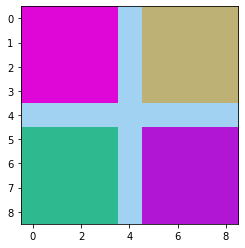

In [2]:
label_map = cle.push(np.asarray([
    [1, 1, 1, 1, 0, 2, 2, 2, 2],
    [1, 1, 1, 1, 0, 2, 2, 2, 2],
    [1, 1, 1, 1, 0, 2, 2, 2, 2],
    [1, 1, 1, 1, 0, 2, 2, 2, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [3, 3, 3, 3, 0, 4, 4, 4, 4],
    [3, 3, 3, 3, 0, 4, 4, 4, 4],
    [3, 3, 3, 3, 0, 4, 4, 4, 4],
    [3, 3, 3, 3, 0, 4, 4, 4, 4]
]))

cle.imshow(label_map, labels=True)

# Determine centroid positions of the labels

In [3]:
centroid_pointlist = cle.label_centroids_to_pointlist(label_map)
print(centroid_pointlist)

[[1.5 6.5 1.5 6.5]
 [1.5 1.5 6.5 6.5]]


# Determine distance matrix

In [4]:
distance_matrix = cle.generate_distance_matrix(centroid_pointlist, centroid_pointlist)
print(distance_matrix)

[[0.        0.        0.        0.        0.       ]
 [0.        0.        4.9999995 4.9999995 7.0710673]
 [0.        4.9999995 0.        7.0710673 4.9999995]
 [0.        4.9999995 7.0710673 0.        4.9999995]
 [0.        7.0710673 4.9999995 4.9999995 0.       ]]


# Draw mesh between centroids with distance <= 5

In [5]:
connection_matrix = cle.smaller_or_equal_constant(distance_matrix, constant=5)
print(connection_matrix)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1.]
 [1. 1. 0. 1. 1.]
 [1. 0. 1. 1. 1.]]


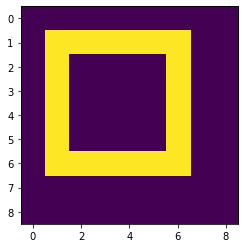

In [6]:
mesh = cle.create_like(label_map)
cle.touch_matrix_to_mesh(centroid_pointlist, connection_matrix, mesh)
cle.imshow(mesh)

# Draw mesh between centroids with distance >= 5

In [7]:
connection_matrix = cle.greater_or_equal_constant(distance_matrix, constant=5)
print(connection_matrix)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


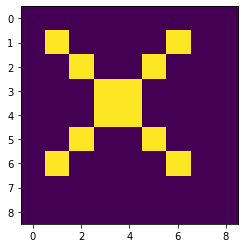

In [8]:
mesh = cle.create_like(label_map)
cle.touch_matrix_to_mesh(centroid_pointlist, connection_matrix, mesh)
cle.imshow(mesh)